# Atividade 4

In [63]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from scipy.stats import kruskal
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
seed = 10

## Leitura dos dados

In [4]:
dataset = pd.read_csv('../Dataset/dataset_pca.csv')

## Separação dos Dados

In [5]:
X = dataset.drop('target', axis=1)
y = dataset.loc[:,'target']

### Separação dos dados para Treino e Teste

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)

## Experimentos

In [7]:
scoring = 'accuracy'
cv = 10
folds = StratifiedKFold(n_splits=cv, random_state=seed)

In [100]:
knn = KNeighborsClassifier(n_neighbors=1, metric='manhattan')
knn_scores = cross_val_score(estimator=knn, X=X_train, y=y_train, cv=folds, scoring=scoring)
print(knn_scores)
print('Mean: %.5f, std: %.5f' % (np.mean(knn_scores), np.std(knn_scores)))

[0.99330784 0.99713193 0.99808429 0.99712368 0.99616491 0.99808245
 0.99712368 0.99232246 0.99711816 0.99231508]
Mean: 0.99588, std: 0.00219


In [9]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, random_state=seed)
tree_scores = cross_val_score(estimator=tree, X=X_train, y=y_train, cv=folds, scoring=scoring)
print(tree_scores)
print('Mean: %.5f, std: %.5f' % (np.mean(tree_scores), np.std(tree_scores)))

[0.97801147 0.9789675  0.98084291 0.98082454 0.97986577 0.97986577
 0.98274209 0.96737044 0.97790586 0.9673391 ]
Mean: 0.97737, std: 0.00519


In [101]:
forest = RandomForestClassifier(n_estimators=110, random_state=seed)
forest_scores = cross_val_score(estimator=forest, X=X_train, y=y_train, cv=folds, scoring=scoring)
print(forest_scores)
print('Mean: %.5f, std: %.5f' % (np.mean(forest_scores), np.std(forest_scores)))

[0.99043977 0.99713193 0.99616858 0.99424736 0.99424736 0.99712368
 0.99520614 0.98944338 0.99711816 0.9932757 ]
Mean: 0.99444, std: 0.00260


In [24]:
mlp = MLPClassifier(hidden_layer_sizes=(55, 55, 50), activation='tanh', solver='lbfgs', max_iter=2000, random_state=seed)
mlp_scores = cross_val_score(estimator=mlp, X=X_train, y=y_train, cv=folds, scoring=scoring)
print(mlp_scores)
print('Mean: %.5f, std: %.5f' % (np.mean(mlp_scores), np.std(mlp_scores)))

[0.99426386 0.99713193 0.99616858 0.99616491 0.99616491 0.99808245
 0.99424736 0.99328215 0.99615754 0.99519693]
Mean: 0.99569, std: 0.00137


In [11]:
mlp_scores = [0.99426386, 0.99713193, 0.99616858, 0.99616491, 0.99616491, 0.99808245, 0.99424736, 0.99328215, 0.99615754, 0.99519693]

In [23]:
bagging = BaggingClassifier(mlp, n_estimators=10)
bagging_scores = cross_val_score(estimator=bagging, X=X_train, y=y_train, cv=folds, scoring=scoring)
print(bagging_scores)
print('Mean: %.5f, std: %.5f' % (np.mean(bagging_scores), np.std(bagging_scores)))

[0.99330784 0.99617591 0.99616858 0.99520614 0.99712368 0.99808245
 0.99520614 0.99328215 0.9932757  0.99519693]
Mean: 0.99530, std: 0.00157


In [12]:
bagging_scores = [0.99330784, 0.99617591, 0.99616858, 0.99520614, 0.99712368, 0.99808245, 0.99520614, 0.99328215, 0.9932757, 0.99519693]

In [22]:
voting = VotingClassifier(estimators=[('knn', knn), ('tree', tree), ('forest', forest), ('mlp', mlp)])
voting_scores = cross_val_score(estimator=voting, X=X_train, y=y_train, cv=folds, scoring=scoring)
print(voting_scores)
print('Mean: %.5f, std: %.5f' % (np.mean(voting_scores), np.std(voting_scores)))

[0.99330784 0.99713193 0.99712644 0.99616491 0.99616491 0.99712368
 0.99712368 0.99232246 0.99903939 0.99615754]
Mean: 0.99617, std: 0.00187


In [13]:
voting_scores = [0.99330784, 0.99713193, 0.99712644, 0.99616491, 0.99616491, 0.99712368, 0.99712368, 0.99232246, 0.99903939, 0.99615754]

## Teste estatístico

### Teste de aderência para verificar se as amostras seguem a distribuição normal

In [23]:
def normality_test(sample, sample_name):
    stat, p = shapiro(sample)
    alpha = 0.05
    if p > alpha:
        print(sample_name + ': Normal distribution (fail to reject H0)')
    else:
        print(sample_name + ' No normal distribution (reject H0)')

In [29]:
clf_results = [(knn_scores, 'KNN'), (tree_scores, 'DF'), (forest_scores, 'RF'), (mlp_scores, 'MLP'), (bagging_scores, 'BG'), (voting_scores, 'VT')]

for clf_result in clf_results:
    normality_test(clf_result[0], clf_result[1])

KNN No normal distribution (reject H0)
DF No normal distribution (reject H0)
RF: Normal distribution (fail to reject H0)
MLP: Normal distribution (fail to reject H0)
BG: Normal distribution (fail to reject H0)
VT: Normal distribution (fail to reject H0)


### Teste estatístico para comparar todas as distribuições
Dado que algumas amostras não seguem a distribuição normal, e o tamanhos destas (10 para cada), será realizado o teste não paramétrico Kruskal-Wallis para verificar se as amostras seguem a mesma distribuição

In [75]:
stat, p = kruskal(knn_scores, tree_scores, forest_scores, mlp_scores, bagging_scores, voting_scores)
print(stat, p)
alpha = 0.05

if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

26.748033926585094 6.386168726978521e-05
Different distributions (reject H0)


### Comparação em pares
O resultado do teste estatístico indica que as amostras não seguem a mesma distribuição. Será realizado testes em pares para identificar quais classificadores tem resultados diferentes, dado a estatística, e então selecionar o melhor.

In [86]:
def compare_samples(pair):
    sample_names = pair[0][1] + ' x ' + pair[1][1]
    sample_1 = pair[0][0]
    sample_2 = pair[1][0]
    stat, p = mannwhitneyu(sample_1, sample_2)
    alpha = 0.05
    if p > alpha:
        print(sample_names + ': Same distributions (fail to reject H0). p-value: ' + str(p))
    else:
        print(sample_names + ': Different distributions (reject H0). p-value: '+ str(p))

In [87]:
import itertools

for pair in itertools.combinations((clf_results), 2):
    compare_samples(pair)

KNN x DF: Different distributions (reject H0). p-value: 9.031736040376755e-05
KNN x RF: Same distributions (fail to reject H0). p-value: 0.10554422281359194
KNN x MLP: Same distributions (fail to reject H0). p-value: 0.260104502890281
KNN x BG: Same distributions (fail to reject H0). p-value: 0.17217059616919178
KNN x VT: Same distributions (fail to reject H0). p-value: 0.484907965909191
DF x RF: Different distributions (reject H0). p-value: 9.031736040376755e-05
DF x MLP: Different distributions (reject H0). p-value: 9.031736040376755e-05
DF x BG: Different distributions (reject H0). p-value: 9.031736040376755e-05
DF x VT: Different distributions (reject H0). p-value: 8.981125249535405e-05
RF x MLP: Same distributions (fail to reject H0). p-value: 0.260104502890281
RF x BG: Same distributions (fail to reject H0). p-value: 0.31145735104705063
RF x VT: Same distributions (fail to reject H0). p-value: 0.10588890052908578
MLP x BG: Same distributions (fail to reject H0). p-value: 0.395437

#### A árvore de decisão foi o único classificador que demonstrou seguir uma distribuição diferente dos demais, segundo o teste estatístico. 

### Análise da distribuição dos resultados

In [30]:
results = pd.DataFrame([knn_scores, tree_scores, forest_scores, mlp_scores, bagging_scores, voting_scores])
results.index = ['KNN', 'DT', 'RF', 'MLP', 'BG', 'VT']
results

,0,1,2,3,4,5,6,7,8,9
KNN,0.993308,0.997132,0.998084,0.997124,0.996165,0.998082,0.997124,0.992322,0.997118,0.992315
DT,0.978011,0.978967,0.980843,0.980825,0.979866,0.979866,0.982742,0.967370,0.977906,0.967339
RF,0.990440,0.997132,0.996169,0.994247,0.994247,0.997124,0.995206,0.989443,0.997118,0.993276
MLP,0.994264,0.997132,0.996169,0.996165,0.996165,0.998082,0.994247,0.993282,0.996158,0.995197
BG,0.993308,0.996176,0.996169,0.995206,0.997124,0.998082,0.995206,0.993282,0.993276,0.995197
VT,0.993308,0.997132,0.997126,0.996165,0.996165,0.997124,0.997124,0.992322,0.999039,0.996158


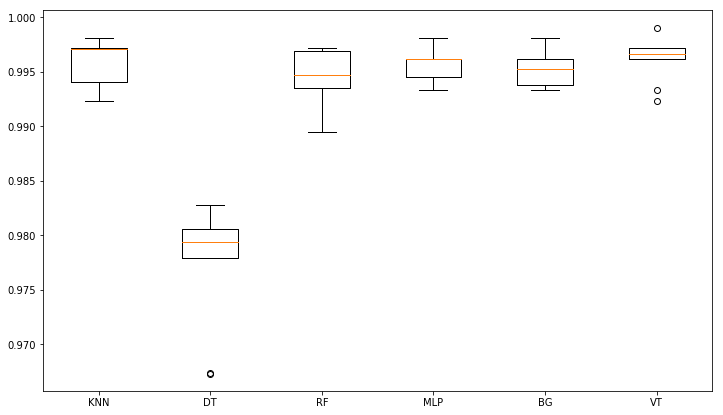

In [31]:
fig, ax = plt.subplots(figsize=(12,7))

ax.boxplot(results)
plt.xticks([1, 2, 3, 4, 5, 6], ['KNN', 'DT', 'RF', 'MLP', 'BG', 'VT'])
# plt.savefig('boxplot_results.png')
plt.show()

### Avaliação no conjunto de treino
Após os testes estatísticos e a análise dos resultados com box-plot, foi selecionado o classificador KNN. Pois além de ter alcançado a segunda maior média, é mais simples e mais rápidos que os outros. 

Accuracy: 0.99454
              precision    recall  f1-score   support

         1.0       0.99      1.00      0.99       653
         2.0       1.00      0.99      0.99       733
         3.0       0.99      0.99      0.99       401
         4.0       1.00      1.00      1.00       504
         5.0       0.99      0.99      0.99       741
         6.0       1.00      1.00      1.00       446

   micro avg       0.99      0.99      0.99      3478
   macro avg       0.99      0.99      0.99      3478
weighted avg       0.99      0.99      0.99      3478



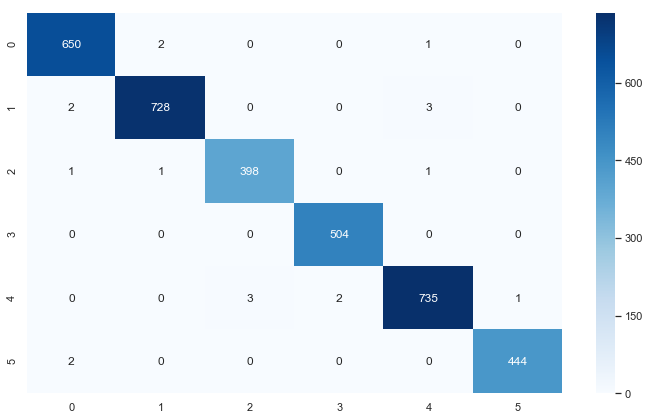

In [111]:
knn = KNeighborsClassifier(n_neighbors=1, metric='manhattan')
knn.fit(X_train, y_train)

pred = knn.predict(X_test)

print('Accuracy: %.5f' % accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(12,7))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap='Blues', ax=ax, fmt='d')
# plt.savefig('confusion_matrix_voting.png')